<a href="https://colab.research.google.com/github/Moh-Bxd/SoaiDatathon/blob/main/student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
# Data Processing
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb


# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X = pd.read_csv('/content/drive/MyDrive/DataSetstudent/X_train.csv')
y = pd.read_csv('/content/drive/MyDrive/DataSetstudent/y_train.csv')
t = pd.read_csv('/content/drive/MyDrive/DataSetstudent/X_test.csv')


X.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,3834,1,1,1,9238,1,1,116.0,1,38,...,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92
1,2613,1,1,1,9130,1,1,134.0,41,1,...,0,0,5,6,5,15.833333,0,12.7,3.7,-1.70
2,556,1,44,1,9003,1,39,150.0,1,3,...,0,3,9,13,6,10.857143,0,15.5,2.8,-4.06
3,2115,1,17,1,9853,1,1,158.0,1,38,...,0,0,6,9,4,11.250000,0,10.8,1.4,1.74
4,869,1,18,1,9254,1,1,137.0,1,19,...,0,0,6,7,5,12.800000,0,16.2,0.3,-0.92


In [ ]:

y.head()

In [ ]:
print(y)

In [ ]:
X.info()

In [ ]:
X.drop(columns=['id'], inplace=True)
t.drop(columns=['id'], inplace=True)

y.drop(columns=['id'], inplace=True)
y.head()

,Target
0,Dropout
1,Graduate
2,Dropout
3,Dropout
4,Graduate


In [ ]:
# Define columns to drop
columns_to_drop = ['Marital status', 'Daytime/evening attendance', 'Nacionality', 'International',
                   'Educational special needs', 'Application order', 'Gender', 'Debtor', 'Displaced',
                   'Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)',
                   'Previous qualification', 'Curricular units 1st sem (without evaluations)',
                   'Curricular units 2nd sem (without evaluations)', 'Scholarship holder']

# Drop columns from X and t
X.drop(columns=columns_to_drop, inplace=True)
t.drop(columns=columns_to_drop, inplace=True)

# Merge corresponding columns for the first and second semesters two by two
X['Total_curricular_units_enrolled'] = X['Curricular units 1st sem (enrolled)'] + X['Curricular units 2nd sem (enrolled)']
X['Total_curricular_units_evaluations'] = (X['Curricular units 1st sem (evaluations)'] +
                                           X['Curricular units 2nd sem (evaluations)'])

X['Total_curricular_units_approved'] = (X['Curricular units 1st sem (approved)'] +
                                         X['Curricular units 2nd sem (approved)'])

X['Total_curricular_units_grade'] = (X['Curricular units 1st sem (grade)'] +
                                      X['Curricular units 2nd sem (grade)'])
# Merge 'Mother's qualification' and 'Father's qualification'
X['Parent_qualification'] = X["Mother's qualification"] + X["Father's qualification"]

# Merge 'Mother's occupation' and 'Father's occupation'
X['Parent_occupation'] = X["Mother's occupation"] + X["Father's occupation"]

# Drop the original columns
X.drop(columns=["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"], inplace=True)


# Drop original columns
X.drop(columns=['Curricular units 1st sem (evaluations)',
                'Curricular units 1st sem (approved)',
                'Curricular units 1st sem (grade)',
                'Curricular units 2nd sem (evaluations)',
                'Curricular units 2nd sem (approved)',
                'Curricular units 2nd sem (grade)',
                'Curricular units 1st sem (enrolled)',
                'Curricular units 2nd sem (enrolled)'], inplace=True)

# List of columns to keep
columns_to_keep = ['Application mode', 'Course', 'Previous qualification (grade)',
                   'Admission grade', 'Tuition fees up to date', 'Age at enrollment',
                   'Total_curricular_units_evaluations', 'Total_curricular_units_approved',
                   'Total_curricular_units_grade', 'Unemployment rate', 'Inflation rate', 'GDP',
                   'Parent_qualification', 'Parent_occupation']

# Select the columns to keep
X = X[columns_to_keep]

# Merge corresponding columns for the first and second semesters two by two in t
t['Total_curricular_units_enrolled'] = t['Curricular units 1st sem (enrolled)'] + t['Curricular units 2nd sem (enrolled)']
t['Total_curricular_units_evaluations'] = (t['Curricular units 1st sem (evaluations)'] +
                                           t['Curricular units 2nd sem (evaluations)'])

t['Total_curricular_units_approved'] = (t['Curricular units 1st sem (approved)'] +
                                         t['Curricular units 2nd sem (approved)'])

t['Total_curricular_units_grade'] = (t['Curricular units 1st sem (grade)'] +
                                      t['Curricular units 2nd sem (grade)'])




# Merge 'Mother's qualification' and 'Father's qualification' in t
t['Parent_qualification'] = t["Mother's qualification"] + t["Father's qualification"]

# Merge 'Mother's occupation' and 'Father's occupation' in t
t['Parent_occupation'] = t["Mother's occupation"] + t["Father's occupation"]

# Drop the original columns in t
t.drop(columns=["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"], inplace=True)


# Drop original columns in t
t.drop(columns=['Curricular units 1st sem (evaluations)',
                'Curricular units 1st sem (approved)',
                'Curricular units 1st sem (grade)',
                'Curricular units 2nd sem (evaluations)',
                'Curricular units 2nd sem (approved)',
                'Curricular units 2nd sem (grade)',
                'Curricular units 1st sem (enrolled)',
                'Curricular units 2nd sem (enrolled)'], inplace=True)

# Select the same columns to keep in t
t = t[columns_to_keep]

# Display the first few rows of X
X.head()


,Application mode,Course,Previous qualification (grade),Admission grade,Tuition fees up to date,Age at enrollment,Total_curricular_units_evaluations,Total_curricular_units_approved,Total_curricular_units_grade,Unemployment rate,Inflation rate,GDP,Parent_qualification,Parent_occupation
0,1,9238,116.0,110.8,1,19,0,0,0.000000,16.2,0.3,-0.92,57,18
1,1,9130,134.0,125.6,1,20,12,10,32.000000,12.7,3.7,-1.70,20,10
2,44,9003,150.0,150.0,1,25,29,20,23.285714,15.5,2.8,-4.06,5,4
3,17,9853,158.0,140.2,1,18,18,9,22.250000,10.8,1.4,1.74,75,10
4,18,9254,137.0,126.9,1,20,14,11,26.657143,16.2,0.3,-0.92,38,9


In [ ]:
X.columns

Index(['Application mode', 'Course', 'Previous qualification (grade)',
       'Admission grade', 'Tuition fees up to date', 'Age at enrollment',
       'Total_curricular_units_evaluations', 'Total_curricular_units_approved',
       'Total_curricular_units_grade', 'Parent_qualification',
       'Parent_occupation'],
      dtype='object')

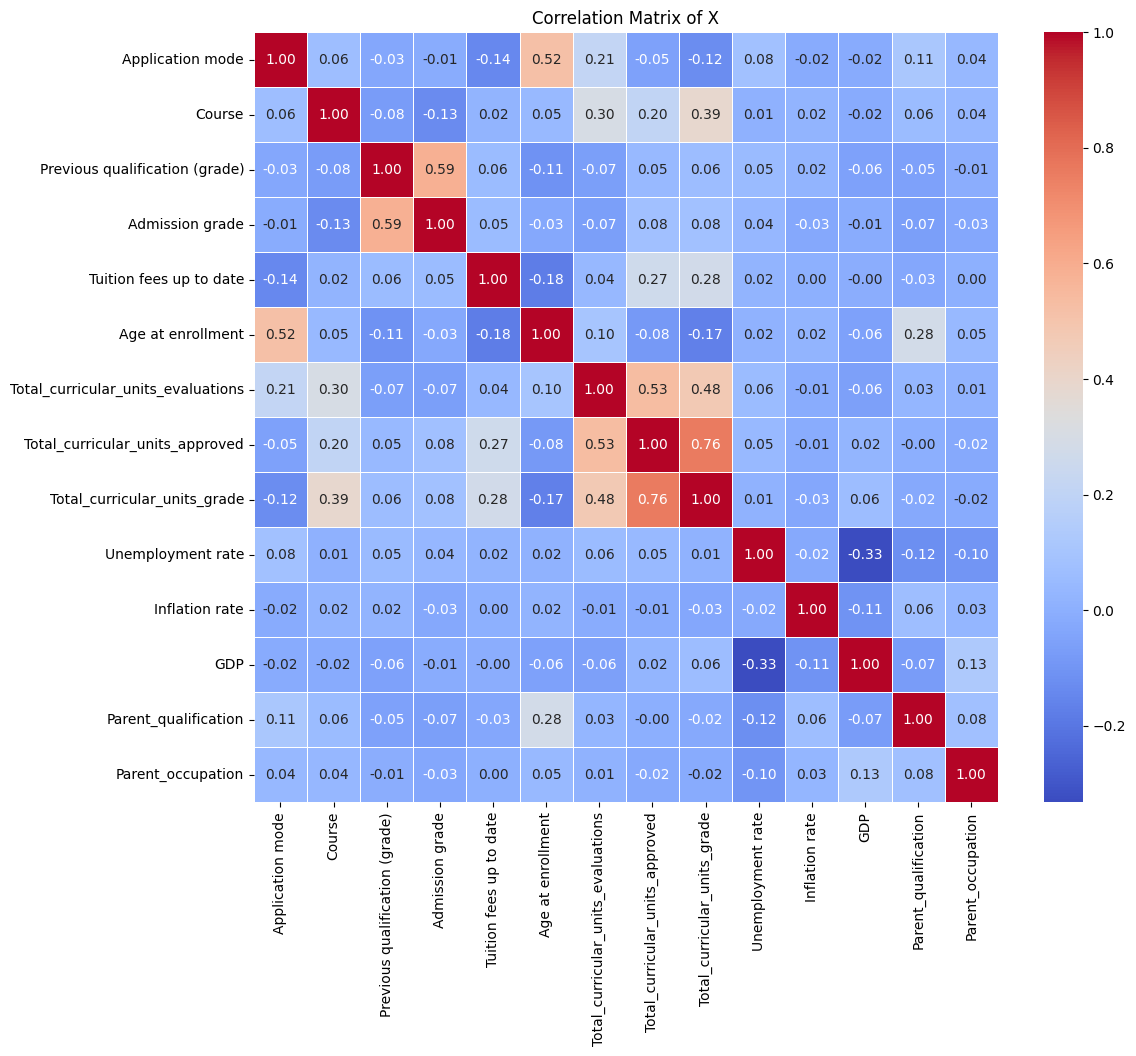

In [ ]:

correlation_matrix = X.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of X')
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [ 314 ],
    'max_depth': [20],
    'min_samples_split': [None,3],
    'min_samples_leaf': [None, 2],
    'max_features': ['auto']
}
rf = RandomForestClassifier()

# Initialize RandomizedSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,      # cross-validation folds
                           n_jobs=-1) # Use all available CPU cores

# Perform the random search
grid_search.fit(X, y)

# Best parameters found
print("Best parameters found:", grid_search.best_params_)

# Best score
print("Best score found:", grid_search.best_score_)
# fr = RandomForestClassifier(random_state=0,n_estimators=314,max_depth=9)
# fr.fit(X, y)

KeyboardInterrupt: 

In [ ]:
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 9, 'n_estimators': 314}


In [ ]:
feature_scores = pd.Series(grid_search.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

Total_curricular_units_approved       0.250436
Total_curricular_units_grade          0.173970
Total_curricular_units_evaluations    0.078957
Tuition fees up to date               0.063313
Admission grade                       0.061803
Course                                0.059800
Age at enrollment                     0.057105
Previous qualification (grade)        0.050508
Parent_occupation                     0.046750
Parent_qualification                  0.041477
Application mode                      0.032665
GDP                                   0.029775
Unemployment rate                     0.027643
Inflation rate                        0.025798
dtype: float64


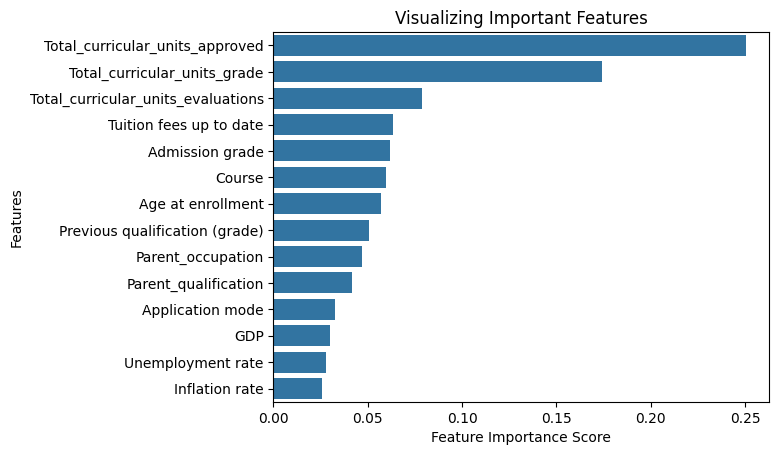

In [ ]:
sns.barplot(x=feature_scores, y=feature_scores.index)
from matplotlib import pyplot as plt




# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [ ]:
X_train_prediciton = grid_search.predict(X)
training_data_accuracy = accuracy_score(X_train_prediciton, y)
print("Accuracy on training data: ", training_data_accuracy)
df_train_predictions = pd.DataFrame({'Predicted Class': X_train_prediciton})

value_counts = df_train_predictions['Predicted Class'].value_counts()
print("Count of each unique value:")
print(value_counts)

Accuracy on training data:  0.9645817633760362
Count of each unique value:
Graduate    2094
Dropout     1246
Enrolled     641
Name: Predicted Class, dtype: int64


In [ ]:

print(t.columns,X.columns)
sub = rand_search.predict(t)
sub = label_encoder.inverse_transform(sub)

sub

Index(['Application mode', 'Course', 'Previous qualification (grade)',
       'Admission grade', 'Tuition fees up to date', 'Age at enrollment',
       'Total_curricular_units_evaluations', 'Total_curricular_units_approved',
       'Total_curricular_units_grade', 'Unemployment rate', 'Inflation rate',
       'GDP', 'Parent_qualification', 'Parent_occupation'],
      dtype='object') Index(['Application mode', 'Course', 'Previous qualification (grade)',
       'Admission grade', 'Tuition fees up to date', 'Age at enrollment',
       'Total_curricular_units_evaluations', 'Total_curricular_units_approved',
       'Total_curricular_units_grade', 'Unemployment rate', 'Inflation rate',
       'GDP', 'Parent_qualification', 'Parent_occupation'],
      dtype='object')


array(['Graduate', 'Graduate', 'Dropout', 'Dropout', 'Graduate',
       'Dropout', 'Enrolled', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Enrolled', 'Dropout',
       'Enrolled', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Graduate', 'Graduate', 'Enrolled', 'Graduate', 'Enrolled',
       'Dropout', 'Graduate', 'Graduate', 'Dropout', 'Graduate',
       'Enrolled', 'Graduate', 'Dropout', 'Dropout', 'Graduate',
       'Graduate', 'Graduate', 'Enrolled', 'Graduate', 'Dropout',
       'Graduate', 'Dropout', 'Enrolled', 'Dropout', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Dropout', 'Graduate',
       'Enrolled', 'Dropout', 'Dropout', 'Graduate', 'Dropout',
       'Graduate', 'Graduate', 'Dropout', 'Graduate', 'Enrolled',
       'Dropout', 'Graduate', 'Dropout', 'Graduate', 'Enrolled',
       'Graduate', 'Graduate', 'Graduate', 'Enrolled', 'Graduate',
       'Dropout', 'Graduate', 'Dropout', 'Enrolled', 'Graduate',
       'Enrolled'

In [ ]:
s = pd.read_csv('/content/drive/MyDrive/DataSetstudent/submission.csv')

In [ ]:
s['Target'] = sub

In [ ]:
s.to_csv('./stud364.csv', index=False)